In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

## Final result

Our final model is a Light GBM regressor with optimized hyperparameters. The model achieved an RMSE of **0.977293 reviews per month**.

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import pandas as pd
import numpy as np

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

**1.** We will choose *Option 2*. We will work on the regression problem using the dataset of New York City Airbnb listings from 2019.

**2.** The dataset has 16 columns and 48,895 rows. We will predict `reviews_per_month`, which is the column in the dataset that best represents the overall popularity of the listing. The other columns contain useful information such as the name, host, location, room type, price, availability, number of reviews, and more.

Overall, interpretability will be important for this problem---one use case for this model could be to help hosts understand what features of their listing are most important for attracting guests. Hence, we will carefully select our features and prioritize models that are easy to interpret such as linear regression.

Not all columns will be useful for the prediction (e.g. `id`). To keep our model simple, we will use recursive feature elimination and potentially manual feature engineering to find a subset of features with the most predictive power.

In terms of pre-processing, the dataset contains diverse numerical ranges, outliers, and missing values that need to be scaled, removed, and imputed, respectively. We will most likely also need to encode the categorical variables in a numerical format (e.g. one-hot or ordinal), depending on the requirements of the model we choose.

**3.** See below.

In [3]:
listings = pd.read_csv('data/AB_NYC_2019.csv')

display(listings.info(), listings.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

None

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
from sklearn.model_selection import train_test_split

# Note: There are some rows where the target variable 'reviews_per_month' is NaN.
# We cannot train a model or evaluate its accuracy on these rows without knowing
# the target value so we will immediately filter out these rows from the dataset.
listings = listings[listings['reviews_per_month'].notna()]

listings_x = listings.drop(columns=['reviews_per_month'])
listings_y = listings['reviews_per_month']
listings_test_x, listings_train_x, listings_test_y, listings_train_y = train_test_split(listings_x, listings_y, test_size=0.3, random_state=123)

display(listings_train_x.head(), listings_train_y.head())

id                                               name   host_id  \
17247  13642568                Luxe & Spacious Williamsburg Studio  79167228   
9782    7516992                       Bedroom in Midtown Apartment  29544115   
593      224510                BEAUTIFUL APARTMENT, GREAT LOCATION    991380   
33216  26224487  3 bedroom 1200sq ft apt with exposed brick & deck  55978113   
460      162493                  Prime Williamsburg 3 BR with Deck    776490   

      host_name neighbourhood_group neighbourhood  latitude  longitude  \
17247      Nate            Brooklyn  Williamsburg  40.71666  -73.95447   
9782     Chisom           Manhattan       Midtown  40.75737  -73.96916   
593    Stefania            Brooklyn   Boerum Hill  40.68653  -73.98562   
33216    Alexis       Staten Island     Stapleton  40.63701  -74.07624   
460      Andres            Brooklyn  Williamsburg  40.71323  -73.95745   

             room_type  price  minimum_nights  number_of_reviews last_review  \
17247  Entire home/apt    105               5                 11  2018-08-06   
9782      Private room     70               1                  1  2015-08-24   
593    Entire home/apt    230               4                 18  2018-07-05   
33216     Private room     50               1                 21  2019-07-07   
460    Entire home/apt    450               5                 37  2018-12-27   

       calculated_host_listings_count  availability_365  
17247                               1                 0  
9782                                1                 0  
593                                 1                 0  
33216                               2               363  
460                                 1                15

17247    0.30
9782     0.02
593      0.21
33216    1.81
460      0.79
Name: reviews_per_month, dtype: float64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

**1.** See below.

**2.** One summary statistic that stands out is the minimum `price`, which is 0. This seems to suggest that the listing is free---this could point to an error in the data. Another interesting summary statistic is the maximum `calculated_host_listings_count`, which is 327. Some hosts have a huge number of listings (far above the mean), which could be correlated with listing popularity.

For the visualizations, we created a pair plot of all numerical features against each other to help us visually identify potential correlations. However, most of the features do not show any visually obvious correlation. We also created a geographical distribution of the `reviews_per_month` to see if location has an impact on listing popularity.

**3.** The target variable `reviews_per_month` shows considerable right-skew. This distribution pattern suggests we may need to consider log transformation or other normalization techniques during preprocessing to better capture the relationship between our features and target variable. 

The dataset contains a mix of categorical variables (such as `room_type` and `neighborhood`) that will require encoding, as well as numerical features that span different scales, reinforcing the need for standardization. 

We observe significant variation in numerical features like `price` and `availability_365`, with the presence of outliers that could negatively influence our model. This is particularly relevant given our choice of RMSE as an evaluation metric which is somewhat sensitive to extreme values. Interestingly, after dropping rows where the target variable was `NaN`, our dataset no longer contains any missing values.

**4.** Root Mean Square Error (RMSE) will serve as our main metric because it penalizes large prediction errors. RMSE maintains the same units as our target variable, making it directly interpretable as an error metric.

For an alternative perspective, we will utilize Mean Absolute Percentage Error (MAPE), which is similar to RMSE but provides an intuitive percentage-based understanding of prediction accuracy. MAPE is especially useful for comparing prediction accuracy across listings with varying baseline review rates.

We will also incorporate the R² score to quantify how effectively our selected features explain variations in review frequency. This also provides a more commonly used, standardized metric for comparing different feature combinations during model development.

In [5]:
display(listings.describe())

id       host_id      latitude     longitude         price  \
count  3.884300e+04  3.884300e+04  38843.000000  38843.000000  38843.000000   
mean   1.809646e+07  6.423915e+07     40.728134    -73.951148    142.317947   
std    1.069370e+07  7.588847e+07      0.054990      0.046695    196.945624   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420      0.000000   
25%    8.720027e+06  7.033824e+06     40.688640    -73.982470     69.000000   
50%    1.887146e+07  2.837193e+07     40.721710    -73.954800    101.000000   
75%    2.755482e+07  1.018465e+08     40.762990    -73.935020    170.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38843.000000       38843.000000       38843.000000   
mean         5.868059          29.297557           1.373221   
std         17.384784          48.186374           1.680442   
min          1.000000           1.000000           0.010000   
25%          1.000000           3.000000           0.190000   
50%          2.000000           9.000000           0.720000   
75%          4.000000          33.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    38843.000000      38843.000000  
mean                         5.164457        114.882888  
std                         26.295665        129.543636  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         55.000000  
75%                          2.000000        229.000000  
max                        327.000000        365.000000

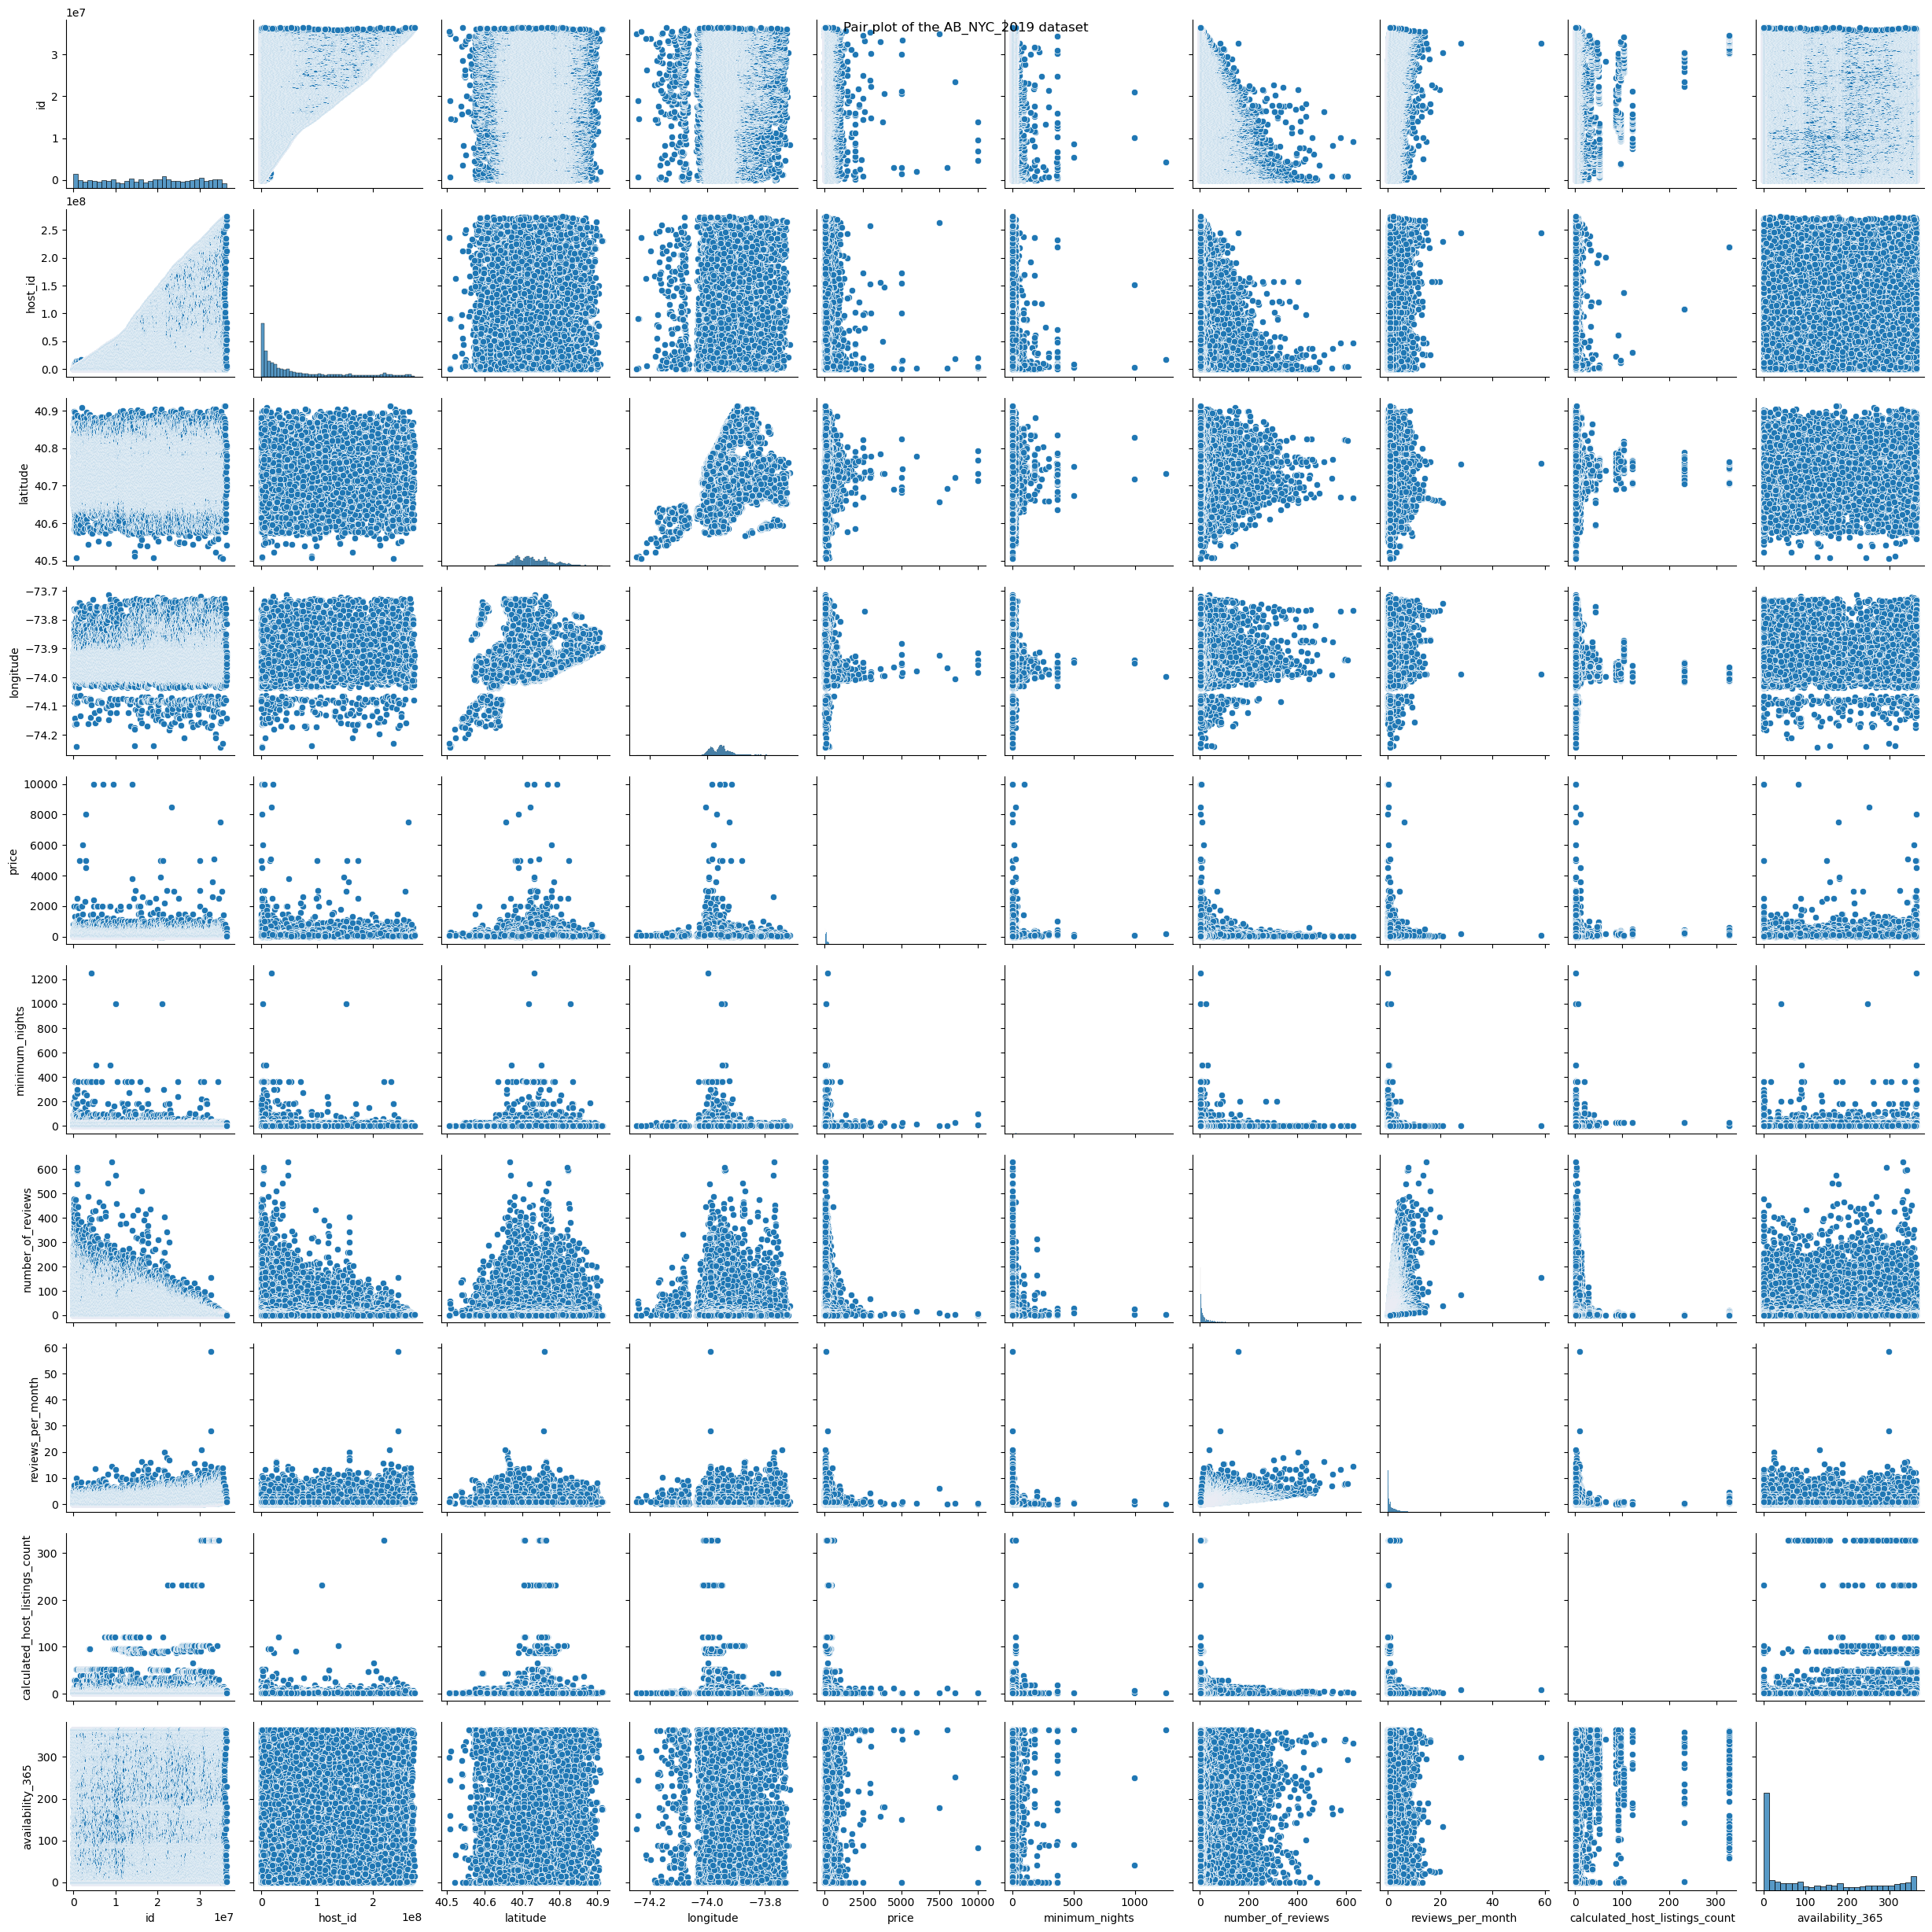

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.pairplot(data=listings)
ax.figure.suptitle('Pair plot of the AB_NYC_2019 dataset')

plt.show()

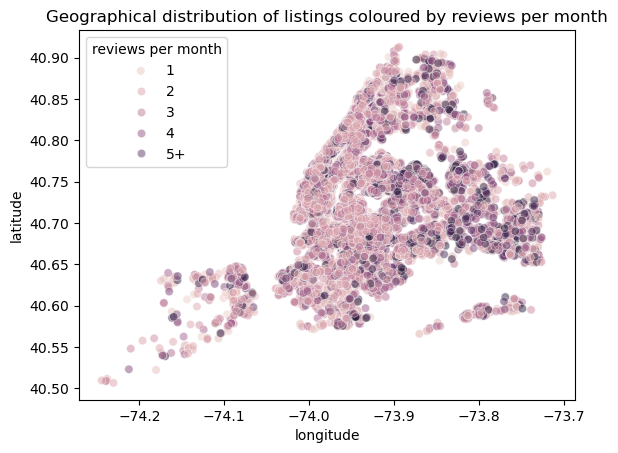

In [7]:
# Most of the 'reviews_per_month' values are between 0 and 5, so
# we will clip the values to this range for better visualization.
ax = sns.scatterplot(x=listings['longitude'], y=listings['latitude'], hue=np.clip(listings['reviews_per_month'], 0, 5), alpha=0.5)
ax.legend(title='reviews per month', labels=['1', '2', '3', '4', '5+'])
ax.set(title='Geographical distribution of listings coloured by reviews per month', xlabel='longitude', ylabel='latitude')

plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [8]:
def transform_and_drop_features(data: pd.DataFrame) -> pd.DataFrame:
    # We drop the 'id' and 'host_id' features because they are simply unique identifiers
    # and do not have any predictive power alone. We drop 'name' and 'host_name' as well,
    # which are too computationally expensive to encode with a count vectorizer. We drop
    # 'latitude', 'longitude', and 'last_review' because they are already represented by
    # engineered features.
    data = data.copy()
    drop_features = ['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review']

    # Pricing features.
    data['relative_price_within_neighbourhood'] = data.groupby('neighbourhood')['price'].transform(lambda x: x - x.mean())
    data['minimum_spend'] = data['minimum_nights'] * data['price']

    # Time features ('2019-07-07' is the most recent timestamp in 'last_review').
    data['days_since_last_review'] = (pd.to_datetime('2019-07-07') - pd.to_datetime(data['last_review'])).dt.days

    # Host features.
    data['mean_number_of_reviews_for_host'] = data.groupby('host_id')['number_of_reviews'].transform('sum') / data['calculated_host_listings_count']

    # Location features (coordinates from 'https://www.latlong.net/').
    data['dist_to_statue_of_liberty'] = np.sqrt((data['latitude'] - 40.689247) ** 2 + (data['longitude'] + 74.044502) ** 2)
    data['dist_to_empire_state'] = np.sqrt((data['latitude'] - 40.748817) ** 2 + (data['longitude'] + 73.985428) ** 2)
    data['dist_to_times_square'] = np.sqrt((data['latitude'] - 40.758896) ** 2 + (data['longitude'] + 73.985130) ** 2)
    data['dist_to_central_park'] = np.sqrt((data['latitude'] - 40.785091) ** 2 + (data['longitude'] + 73.968285) ** 2)

    return data.drop(columns=drop_features)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FunctionTransformer, make_pipeline
from sklearn.preprocessing import OneHotEncoder

numeric_features = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'relative_price_within_neighbourhood', 'minimum_spend', 'days_since_last_review', 'mean_number_of_reviews_for_host', 'dist_to_statue_of_liberty', 'dist_to_empire_state', 'dist_to_times_square', 'dist_to_central_park']
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

def transform_and_drop_features_names(_: FunctionTransformer, __: list) -> list:
    # Everything from 'numeric_features' and 'categorical_features' in a certain order.
    all_features = ['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'relative_price_within_neighbourhood', 'minimum_spend', 'days_since_last_review', 'mean_number_of_reviews_for_host', 'dist_to_statue_of_liberty', 'dist_to_empire_state', 'dist_to_times_square', 'dist_to_central_park']

    return all_features

transform_pipeline = make_pipeline(
    FunctionTransformer(transform_and_drop_features, feature_names_out=transform_and_drop_features_names),
    make_column_transformer(
        (StandardScaler(), numeric_features),
        (OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)))

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

**1.** The baseline model performs very poorly on the training dataset, as suggested by the extremely high RMSE of about 1.75 reviews per month and the negative R² score in validation. This indicates that the model is not capturing any of the patterns in the data, which makes sense as the dummy regressor simply predicts the mean of the training set for all instances.

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

def get_cv_metrics(pipeline: Pipeline) -> pd.DataFrame:
    # We use only R2 for optimizing the hyperparameters, but for evaluation we will use all
    # three metrics since they provide a more comprehensive view of the model's performance.
    metrics = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error']

    return pd.DataFrame(cross_validate(pipeline, listings_train_x, listings_train_y, scoring=metrics, return_train_score=True)).agg(['mean', 'std']).T

In [11]:
from sklearn.dummy import DummyRegressor

baseline_pipeline = make_pipeline(transform_pipeline, DummyRegressor())
baseline_cv = get_cv_metrics(baseline_pipeline)

display(baseline_cv)

mean       std
fit_time                                  0.026764  0.002993
score_time                                0.014917  0.000775
test_r2                                  -0.000426  0.000729
train_r2                                  0.000000  0.000000
test_neg_root_mean_squared_error         -1.758740  0.177976
train_neg_root_mean_squared_error        -1.765287  0.046743
test_neg_mean_absolute_percentage_error  -7.012519  0.342102
train_neg_mean_absolute_percentage_error -7.011854  0.078300

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

**1--3.** See below.

**4.** These metrics demonstrate substantial improvement over the baseline model, with an RMSE of about 1.36 reviews per month and a positive R² score of roughly 0.397 in validation. This indicates that our model is beginning to capture meaningful patterns in the data. The comparatively small standard deviation of about 0.185 for RMSE and 0.0559 and for R² score points to consistent model performance, which is good.

Our hyperparameter tuning process explored various alpha values to find the optimal level of complexity. The final selected alpha value reduces overfitting while maintaining predictive power. However, the error is still objectively quite high, which suggests that the relationship between our features and `reviews_per_month` may be more complex than what a simple linear model can capture.

In [12]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def optimize_hyperparameters(pipeline: Pipeline, grid: dict, use_random_search: bool) -> tuple[Pipeline, pd.DataFrame]:    
    if use_random_search:
        search = RandomizedSearchCV(pipeline, grid, n_iter=100, n_jobs=8, cv=3, random_state=123, return_train_score=True)
        search.fit(listings_train_x, listings_train_y)
    else:
        search = GridSearchCV(pipeline, grid, n_jobs=8, cv=3, return_train_score=True)
        search.fit(listings_train_x, listings_train_y)

    return search.best_estimator_, pd.DataFrame(search.cv_results_)

In [13]:
from sklearn.linear_model import Ridge

optimized_ridge_pipeline, ridge_search_cv = optimize_hyperparameters(make_pipeline(transform_pipeline, Ridge(random_state=123)), { 'ridge__alpha': range(1, 100) }, False)
optimized_ridge_cv = get_cv_metrics(optimized_ridge_pipeline)

display(optimized_ridge_pipeline, optimized_ridge_cv)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('functiontransformer',
                                  FunctionTransformer(feature_names_out=<function transform_and_drop_features_names at 0x30d2c8040>,
                                                      func=<function transform_and_drop_features at 0x30aa5ede0>)),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   ['price',
                                                                    'minimum_nights',
                                                                    'number_of_revie...
                                                                    'minimum_spend',
                                                                    'days_since_last_review',
                                                                    'mean_number_of_reviews_for_host',
                                                                    'dist_to_statue_of_liberty',
                                                                    'dist_to_empire_state',
                                                                    'dist_to_times_square',
                                                                    'dist_to_central_park']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['neighbourhood_group',
                                                                    'neighbourhood',
                                                                    'room_type'])]))])),
                ('ridge', Ridge(alpha=24, random_state=123))])

mean       std
fit_time                                  0.038929  0.004199
score_time                                0.014723  0.000493
test_r2                                   0.397993  0.055953
train_r2                                  0.409309  0.017059
test_neg_root_mean_squared_error         -1.365814  0.185812
train_neg_root_mean_squared_error        -1.356898  0.050525
test_neg_mean_absolute_percentage_error  -3.019286  0.167030
train_neg_mean_absolute_percentage_error -2.978135  0.034293

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

**1.** See below.

**2.** The decision tree model has an RMSE of about 1.19 reviews per month and an R² score of roughly 0.534 in validation. While it exhibits severe overfitting, performs surprisingly well for its simplicity and computational efficiency. The fit and score times are very fast, but a decision tree regressor is not the best choice in this context as its straightforward nature is likely to prevent it from capturing nuanced relationships. 

The K-nearest neighbors (KNN) model has an RMSE of about 1.33 reviews per month and an R² score of roughly 0.428 in validation. It shows little to no overfitting, but performs consistently worse than the decision tree model. The fit and score times as reported are not much slower than the decision tree, but in practice we found that the hyperparameter optimization process took significantly longer. Due to the high dimensionality and lack of obvious data clustering observed during EDA, we conclude that KNN is ill-suited for this problem.

Light GBM emerges as the strongest performer with an RMSE of about 1.09 reviews per month and an R² score of 0.611 in validation. The model shows signs of moderate overfitting, and while its accuracy metrics are still objectively not excellent, it significantly outperforms other models. The model is reasonably computationally efficient too---while the fit and score times as reported are longer than the other models, we found it to be quite fast in practice. Overall, this model is a clear improvement over the linear model and other models we tried.
 
In comparison, to all three models, the performance of the linear model performance is notably relatively poor. The fact that the linear model underperforms suggests that the relationships between our features and `reviews_per_month` are indeed quite complex.

In [14]:
from sklearn.tree import DecisionTreeRegressor

optimized_decision_tree_pipeline, decision_tree_search_cv = optimize_hyperparameters(make_pipeline(transform_pipeline, DecisionTreeRegressor(random_state=123)), { 'decisiontreeregressor__max_depth': range(1, 100) }, False)
optimized_decision_tree_cv = get_cv_metrics(optimized_decision_tree_pipeline)

display(optimized_decision_tree_pipeline, optimized_decision_tree_cv)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('functiontransformer',
                                  FunctionTransformer(feature_names_out=<function transform_and_drop_features_names at 0x30d2c8040>,
                                                      func=<function transform_and_drop_features at 0x30aa5ede0>)),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   ['price',
                                                                    'minimum_nights',
                                                                    'number_of_revie...
                                                                    'days_since_last_review',
                                                                    'mean_number_of_reviews_for_host',
                                                                    'dist_to_statue_of_liberty',
                                                                    'dist_to_empire_state',
                                                                    'dist_to_times_square',
                                                                    'dist_to_central_park']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['neighbourhood_group',
                                                                    'neighbourhood',
                                                                    'room_type'])]))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=123))])

mean       std
fit_time                                  0.072464  0.004764
score_time                                0.014832  0.000445
test_r2                                   0.534128  0.037814
train_r2                                  0.626318  0.006787
test_neg_root_mean_squared_error         -1.198618  0.120628
train_neg_root_mean_squared_error        -1.078913  0.021981
test_neg_mean_absolute_percentage_error  -0.876692  0.030858
train_neg_mean_absolute_percentage_error -0.860505  0.004981

In [15]:
from sklearn.neighbors import KNeighborsRegressor

optimized_knn_pipeline, knn_search_cv = optimize_hyperparameters(make_pipeline(transform_pipeline, KNeighborsRegressor()), { 'kneighborsregressor__n_neighbors': range(1, 100) }, False)
optimized_knn_cv = get_cv_metrics(optimized_knn_pipeline)

display(optimized_knn_pipeline, optimized_knn_cv)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('functiontransformer',
                                  FunctionTransformer(feature_names_out=<function transform_and_drop_features_names at 0x30d2c8040>,
                                                      func=<function transform_and_drop_features at 0x30aa5ede0>)),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   ['price',
                                                                    'minimum_nights',
                                                                    'number_of_revie...
                                                                    'days_since_last_review',
                                                                    'mean_number_of_reviews_for_host',
                                                                    'dist_to_statue_of_liberty',
                                                                    'dist_to_empire_state',
                                                                    'dist_to_times_square',
                                                                    'dist_to_central_park']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['neighbourhood_group',
                                                                    'neighbourhood',
                                                                    'room_type'])]))])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=15))])

mean       std
fit_time                                  0.029280  0.001299
score_time                                0.097038  0.018790
test_r2                                   0.428962  0.053657
train_r2                                  0.496696  0.016608
test_neg_root_mean_squared_error         -1.331617  0.193625
train_neg_root_mean_squared_error        -1.252513  0.048653
test_neg_mean_absolute_percentage_error  -1.444802  0.049553
train_neg_mean_absolute_percentage_error -1.351734  0.011331

In [16]:
from lightgbm import LGBMRegressor

# There are two hyperparameters to optimize for this model. Exhaustive grid search would
# be far too computationally expensive, so we will have to use randomized search instead.
optimized_light_gbm_pipeline, light_gbm_search_cv = optimize_hyperparameters(make_pipeline(transform_pipeline, LGBMRegressor(random_state=123, force_col_wise=True, verbosity=-1)), { 'lgbmregressor__n_estimators': range(1, 100), 'lgbmregressor__max_depth': range(1, 100) }, True)
optimized_light_gbm_cv = get_cv_metrics(optimized_light_gbm_pipeline)

display(optimized_light_gbm_pipeline, optimized_light_gbm_cv)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('functiontransformer',
                                  FunctionTransformer(feature_names_out=<function transform_and_drop_features_names at 0x30d2c8040>,
                                                      func=<function transform_and_drop_features at 0x30aa5ede0>)),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   ['price',
                                                                    'minimum_nights',
                                                                    'number_of_revie...
                                                                    'mean_number_of_reviews_for_host',
                                                                    'dist_to_statue_of_liberty',
                                                                    'dist_to_empire_state',
                                                                    'dist_to_times_square',
                                                                    'dist_to_central_park']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['neighbourhood_group',
                                                                    'neighbourhood',
                                                                    'room_type'])]))])),
                ('lgbmregressor',
                 LGBMRegressor(force_col_wise=True, max_depth=9,
                               n_estimators=93, random_state=123,
                               verbosity=-1))])

mean       std
fit_time                                  0.309467  0.005336
score_time                                0.017418  0.000408
test_r2                                   0.611030  0.059837
train_r2                                  0.763644  0.018013
test_neg_root_mean_squared_error         -1.099635  0.192543
train_neg_root_mean_squared_error        -0.858249  0.051907
test_neg_mean_absolute_percentage_error  -0.708200  0.013087
train_neg_mean_absolute_percentage_error -0.615697  0.009298

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

Given how computationally intensive the RFECV process is (often taking hours to complete) we have made the practical decision to streamline our approach moving forward. We will focus exclusively on our best-performing model (Light GBM) while retaining the linear model as a point of reference. 

Note that in an ideal scenario with unlimited resources, we would conduct another round of hyperparameter optimization on the entire pipeline including the feature selection step. This could further improve the performance of the model, since if RFECV reduces the number of features, this could potentially shift the optimal hyperparameters.

We find that RFECV does not have a significant impact on our training and validation scores, positive or negative. Hence, we have opted to proceed without feature selection in our final model.

In [17]:
from sklearn.feature_selection import RFECV

# Set this flag if RFECV is preventing you from running the notebook.
# This will skip the code cells for feature selection, which is fine
# since the final pipeline does not use it anyways.
should_skip_feature_selection = False

def optimize_features(pipeline: Pipeline) -> Pipeline:
    # We insert RFECV immediately before the final step, using the same 
    # model from the given pipeline to estimate the feature importances.
    steps = pipeline.steps.copy()
    steps.insert(-1, ('rfecv', RFECV(pipeline.steps[-1][1], n_jobs=8, cv=3)))

    return Pipeline(steps)

In [18]:
if should_skip_feature_selection:
    print('Skipping RFECV feature selection!')
else:
    rfe_ridge_pipeline = optimize_features(optimized_ridge_pipeline)
    rfe_ridge_cv = get_cv_metrics(rfe_ridge_pipeline)

    display(rfe_ridge_pipeline, rfe_ridge_cv)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('functiontransformer',
                                  FunctionTransformer(feature_names_out=<function transform_and_drop_features_names at 0x30d2c8040>,
                                                      func=<function transform_and_drop_features at 0x30aa5ede0>)),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   ['price',
                                                                    'minimum_nights',
                                                                    'number_of_revie...
                                                                    'dist_to_statue_of_liberty',
                                                                    'dist_to_empire_state',
                                                                    'dist_to_times_square',
                                                                    'dist_to_central_park']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['neighbourhood_group',
                                                                    'neighbourhood',
                                                                    'room_type'])]))])),
                ('rfecv',
                 RFECV(cv=3, estimator=Ridge(alpha=24, random_state=123),
                       n_jobs=8)),
                ('ridge', Ridge(alpha=24, random_state=123))])

mean       std
fit_time                                  2.829655  0.434005
score_time                                0.015001  0.000303
test_r2                                   0.395763  0.057630
train_r2                                  0.405243  0.018059
test_neg_root_mean_squared_error         -1.368022  0.184219
train_neg_root_mean_squared_error        -1.361643  0.054180
test_neg_mean_absolute_percentage_error  -3.012586  0.180629
train_neg_mean_absolute_percentage_error -2.980781  0.029389

In [19]:
if should_skip_feature_selection:
    print('Skipping RFECV feature selection!')
else:
    rfe_light_gbm_pipeline = optimize_features(optimized_light_gbm_pipeline)
    rfe_light_gbm_cv = get_cv_metrics(rfe_light_gbm_pipeline)

    display(rfe_light_gbm_pipeline, rfe_light_gbm_cv)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('functiontransformer',
                                  FunctionTransformer(feature_names_out=<function transform_and_drop_features_names at 0x30d2c8040>,
                                                      func=<function transform_and_drop_features at 0x30aa5ede0>)),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   ['price',
                                                                    'minimum_nights',
                                                                    'number_of_revie...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['neighbourhood_group',
                                                                    'neighbourhood',
                                                                    'room_type'])]))])),
                ('rfecv',
                 RFECV(cv=3,
                       estimator=LGBMRegressor(force_col_wise=True, max_depth=9,
                                               n_estimators=93,
                                               random_state=123, verbosity=-1),
                       n_jobs=8)),
                ('lgbmregressor',
                 LGBMRegressor(force_col_wise=True, max_depth=9,
                               n_estimators=93, random_state=123,
                               verbosity=-1))])

mean       std
fit_time                                  186.831681  6.832864
score_time                                  0.019141  0.002233
test_r2                                     0.610228  0.059175
train_r2                                    0.766337  0.018993
test_neg_root_mean_squared_error           -1.100620  0.190684
train_neg_root_mean_squared_error          -0.853291  0.053295
test_neg_mean_absolute_percentage_error    -0.694421  0.022345
train_neg_mean_absolute_percentage_error   -0.606397  0.016967

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

We have already conducted thorough cross-validation and hyperparameter optimization in the previous sections. We have accumulated the cross-validation results for each of the models we have explored so far, which provides sufficient data for visualization. In this section, we will focus on visualizing and analyzing those results.

For the linear model, we observed that the optimal value of alpha was 24. This is quite high, suggesting that the model requires heavy regularization to prevent overfitting. This supports our earlier observation that the linear model is not well-suited for this problem and that the relationships in the dataset are quite complex.

For the decision tree model, we observed that the optimal max. depth was only 5. The curves for the training and validation scores demonstrate that the model is extremely sensitive to both overfitting and randomness, which is expected given the simplicity of the model.

For the KNN model, we observed that the optimal number of neighbors was 15. The curves for the training and validation scores explain why the training and validation scores are so similar even if the model is overfitting---the predictions eventually converge to the mean of the target variable.

The curves are particularly interesting for our Light GBM model, where we simultaneously optimized two parameters, creating a more complex optimization landscape compared to our other models. We can see that the performance of the model is dominated by the number of estimators---tuning the max. depth was far less impactful by comparison, which leads to the jagged curve for max. depth. The optimal number of estimators was 93 with a max. depth of 9.

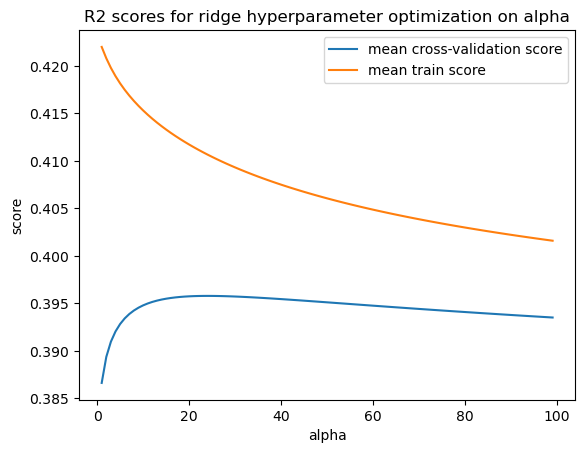

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
23       0.059894      0.008449         0.031319        0.014855   
24       0.057338      0.016156         0.040755        0.007685   
22       0.071491      0.005518         0.027124        0.004609   
25       0.074444      0.014315         0.038210        0.011391   
21       0.065043      0.002412         0.046407        0.006375   

    param_ridge__alpha                params  split0_test_score  \
23                  24  {'ridge__alpha': 24}           0.434573   
24                  25  {'ridge__alpha': 25}           0.434487   
22                  23  {'ridge__alpha': 23}           0.434657   
25                  26  {'ridge__alpha': 26}           0.434399   
21                  22  {'ridge__alpha': 22}           0.434739   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
23           0.398369           0.354409         0.395784        0.032778   
24           0.398567           0.354292         0.395782        0.032799   
22           0.398159           0.354528         0.395781        0.032756   
25           0.398751           0.354176         0.395775        0.032819   
21           0.397935           0.354648         0.395774        0.032733   

    rank_test_score  split0_train_score  split1_train_score  \
23                1            0.389309            0.408548   
24                2            0.389079            0.408276   
22                3            0.389548            0.408828   
25                4            0.388856            0.408010   
21                5            0.389795            0.409116   

    split2_train_score  mean_train_score  std_train_score  
23            0.434127          0.410662         0.018358  
24            0.433901          0.410419         0.018361  
22            0.434362          0.410913         0.018355  
25            0.433683          0.410183         0.018365  
21            0.434607          0.411173         0.018352

In [20]:
ax = sns.lineplot(x=ridge_search_cv['param_ridge__alpha'], y=ridge_search_cv['mean_test_score'], label='mean cross-validation score')
ax = sns.lineplot(x=ridge_search_cv['param_ridge__alpha'], y=ridge_search_cv['mean_train_score'], label='mean train score')
ax.set(title='R2 scores for ridge hyperparameter optimization on alpha', xlabel='alpha', ylabel='score')

plt.show()

display(ridge_search_cv.sort_values('rank_test_score').head())

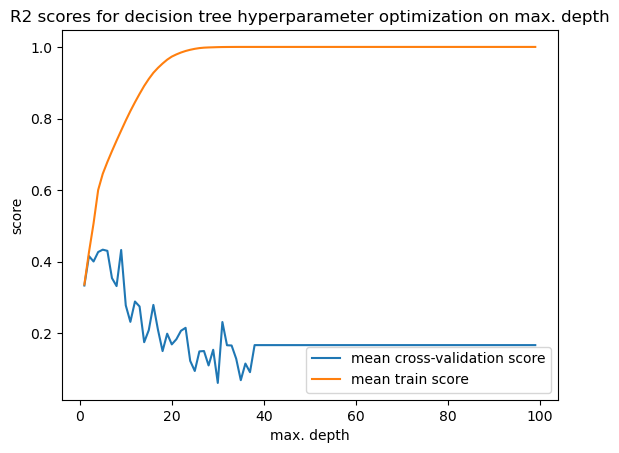

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       0.113202      0.009140         0.041513        0.005753   
8       0.170541      0.019927         0.053095        0.025382   
5       0.126559      0.008794         0.034291        0.005759   
3       0.111695      0.010688         0.038843        0.001492   
1       0.136049      0.006349         0.049367        0.009143   

   param_decisiontreeregressor__max_depth  \
4                                       5   
8                                       9   
5                                       6   
3                                       4   
1                                       2   

                                    params  split0_test_score  \
4  {'decisiontreeregressor__max_depth': 5}           0.252979   
8  {'decisiontreeregressor__max_depth': 9}           0.222475   
5  {'decisiontreeregressor__max_depth': 6}           0.285006   
3  {'decisiontreeregressor__max_depth': 4}           0.231117   
1  {'decisiontreeregressor__max_depth': 2}           0.441286   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
4           0.475263           0.572366         0.433536        0.133686   
8           0.523392           0.552067         0.432645        0.149073   
5           0.531157           0.474604         0.430256        0.105270   
3           0.518092           0.531494         0.426901        0.138548   
1           0.438630           0.367091         0.415669        0.034367   

   rank_test_score  split0_train_score  split1_train_score  \
4                1            0.634381            0.678524   
8                2            0.759672            0.776731   
5                3            0.665058            0.702073   
3                4            0.605968            0.625278   
1                5            0.412344            0.411194   

   split2_train_score  mean_train_score  std_train_score  
4            0.623588          0.645498         0.023765  
8            0.762781          0.766394         0.007418  
5            0.668251          0.678461         0.016747  
3            0.569563          0.600270         0.023100  
1            0.455211          0.426250         0.020484

In [21]:
ax = sns.lineplot(x=decision_tree_search_cv['param_decisiontreeregressor__max_depth'], y=decision_tree_search_cv['mean_test_score'], label='mean cross-validation score')
ax = sns.lineplot(x=decision_tree_search_cv['param_decisiontreeregressor__max_depth'], y=decision_tree_search_cv['mean_train_score'], label='mean train score')
ax.set(title='R2 scores for decision tree hyperparameter optimization on max. depth', xlabel='max. depth', ylabel='score')

plt.show()

display(decision_tree_search_cv.sort_values('rank_test_score').head())

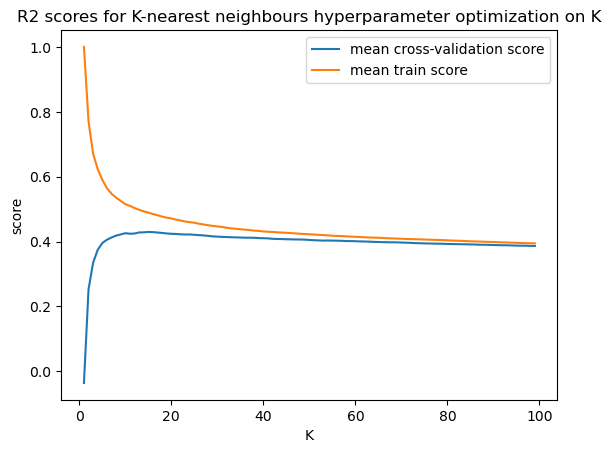

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14       0.040535      0.005247         0.606782        0.005926   
15       0.042777      0.006296         0.593942        0.028405   
13       0.041901      0.004968         0.615488        0.028245   
12       0.045813      0.005023         0.622586        0.012931   
16       0.047145      0.004052         0.687248        0.039257   

    param_kneighborsregressor__n_neighbors  \
14                                      15   
15                                      16   
13                                      14   
12                                      13   
16                                      17   

                                      params  split0_test_score  \
14  {'kneighborsregressor__n_neighbors': 15}           0.465715   
15  {'kneighborsregressor__n_neighbors': 16}           0.466002   
13  {'kneighborsregressor__n_neighbors': 14}           0.463554   
12  {'kneighborsregressor__n_neighbors': 13}           0.464306   
16  {'kneighborsregressor__n_neighbors': 17}           0.465384   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
14           0.442724           0.380796         0.429745        0.035862   
15           0.439333           0.381911         0.429082        0.035087   
13           0.441033           0.381010         0.428532        0.034838   
12           0.439815           0.380529         0.428217        0.035171   
16           0.438170           0.380284         0.427946        0.035486   

    rank_test_score  split0_train_score  split1_train_score  \
14                1            0.469011            0.482286   
15                2            0.465385            0.476842   
13                3            0.471292            0.487251   
12                4            0.474869            0.492417   
16                5            0.462661            0.472176   

    split2_train_score  mean_train_score  std_train_score  
14            0.516815          0.489371         0.020149  
15            0.512061          0.484763         0.019861  
13            0.520720          0.493087         0.020597  
12            0.526228          0.497838         0.021315  
16            0.508750          0.481196         0.019867

In [22]:
ax = sns.lineplot(x=knn_search_cv['param_kneighborsregressor__n_neighbors'], y=knn_search_cv['mean_test_score'], label='mean cross-validation score')
ax = sns.lineplot(x=knn_search_cv['param_kneighborsregressor__n_neighbors'], y=knn_search_cv['mean_train_score'], label='mean train score')
ax.set(title='R2 scores for K-nearest neighbours hyperparameter optimization on K', xlabel='K', ylabel='score')

plt.show()

display(knn_search_cv.sort_values('rank_test_score').head())

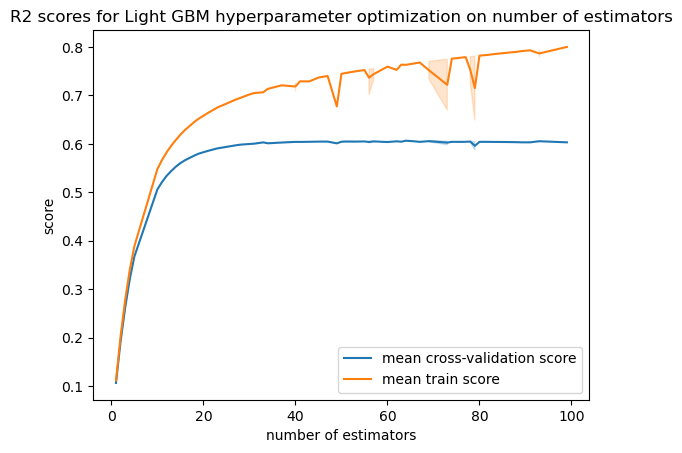

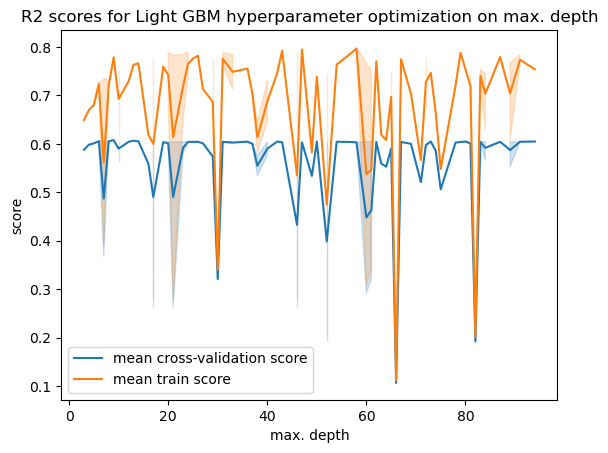

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
60       1.121140      0.014480         0.048909        0.010405   
9        0.892127      0.033235         0.075797        0.050771   
11       1.019264      0.101720         0.042828        0.011243   
68       0.736549      0.053796         0.066326        0.006036   
87       0.873200      0.015232         0.044243        0.004264   

    param_lgbmregressor__n_estimators  param_lgbmregressor__max_depth  \
60                                 93                               9   
9                                  69                               7   
11                                 64                              13   
68                                 73                               6   
87                                 57                               8   

                                               params  split0_test_score  \
60  {'lgbmregressor__n_estimators': 93, 'lgbmregre...           0.642531   
9   {'lgbmregressor__n_estimators': 69, 'lgbmregre...           0.645929   
11  {'lgbmregressor__n_estimators': 64, 'lgbmregre...           0.646512   
68  {'lgbmregressor__n_estimators': 73, 'lgbmregre...           0.644815   
87  {'lgbmregressor__n_estimators': 57, 'lgbmregre...           0.643289   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
60           0.618560           0.561376         0.607489        0.034044   
9            0.618169           0.556425         0.606841        0.037408   
11           0.616233           0.556464         0.606403        0.037413   
68           0.614970           0.556553         0.605446        0.036657   
87           0.618916           0.554088         0.605431        0.037644   

    rank_test_score  split0_train_score  split1_train_score  \
60                1            0.757411            0.769859   
9                 2            0.711221            0.721192   
11                3            0.743161            0.753853   
68                4            0.697367            0.707627   
87                5            0.708156            0.720540   

    split2_train_score  mean_train_score  std_train_score  
60            0.807704          0.778325         0.021387  
9             0.768836          0.733750         0.025141  
11            0.791920          0.762978         0.020925  
68            0.758430          0.721141         0.026698  
87            0.767991          0.732229         0.025788

In [23]:
ax = sns.lineplot(x=light_gbm_search_cv['param_lgbmregressor__n_estimators'], y=light_gbm_search_cv['mean_test_score'], label='mean cross-validation score')
ax = sns.lineplot(x=light_gbm_search_cv['param_lgbmregressor__n_estimators'], y=light_gbm_search_cv['mean_train_score'], label='mean train score')
ax.set(title='R2 scores for Light GBM hyperparameter optimization on number of estimators', xlabel='number of estimators', ylabel='score')

plt.show()

ax = sns.lineplot(x=light_gbm_search_cv['param_lgbmregressor__max_depth'], y=light_gbm_search_cv['mean_test_score'], label='mean cross-validation score')
ax = sns.lineplot(x=light_gbm_search_cv['param_lgbmregressor__max_depth'], y=light_gbm_search_cv['mean_train_score'], label='mean train score')
ax.set(title='R2 scores for Light GBM hyperparameter optimization on max. depth', xlabel='max. depth', ylabel='score')

plt.show()

display(light_gbm_search_cv.sort_values('rank_test_score').head())

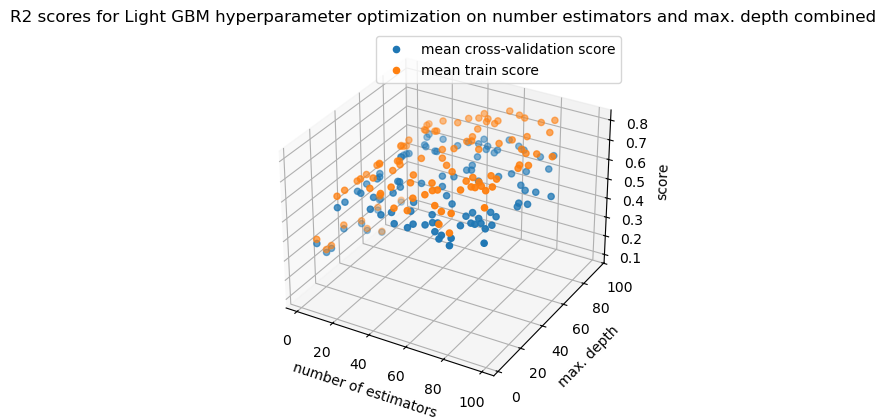

In [24]:
# 3D plots are not very practical; this one is just for fun.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(light_gbm_search_cv['param_lgbmregressor__n_estimators'], light_gbm_search_cv['param_lgbmregressor__max_depth'], light_gbm_search_cv['mean_test_score'], label='mean cross-validation score')
ax.scatter(light_gbm_search_cv['param_lgbmregressor__n_estimators'], light_gbm_search_cv['param_lgbmregressor__max_depth'], light_gbm_search_cv['mean_train_score'], label='mean train score')
ax.legend()
ax.set(title='R2 scores for Light GBM hyperparameter optimization on number estimators and max. depth combined', xlabel='number of estimators', ylabel='max. depth', zlabel='score')

plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

**1.** See below.

**2.** The SHAP values reveal a clear hierarchy of feature importance in predicting the frequency of reviews on a monthly basis, with three features emerging as particularly important. 

- `days_since_last_review` stands out as the most significant predictor, which makes sense intuitively. In the context of the problem, recent review activity often indicates an actively booked property; more customers would lead to more reviews overall. Furthermore, this is the only temporal feature in the dataset, which likely contributes to its strong predictive power for review frequency. 

- `number_of_reviews` follows as the second most important feature, suggesting a strong self-reinforcing effect where listings with an established history tend to maintain a consistent pattern of reviews. These two features surpass all others in importance by a considerable margin, which indicates that historical review activity is a key driver of future review frequency.

- `minimum_nights` indicates that a listing's booking flexibility significantly impacts its review frequency as well. A shorter minimum stay tends to positively influence the frequency of reviews, possibly because shorter stays create more opportunities for different guests to leave reviews.

These findings provide actionable insights for hosts: maintaining regular bookings to minimize gaps between reviews and considering flexible minimum stay requirements could help improve a host's listing's review frequency (and by proxy, its popularity). The importance of these features also validates our model's ability to capture meaningful patterns in the data, as these relationships align with reasonable business expectations about what drives listing popularity.

In [25]:
from shap import TreeExplainer

explainer = TreeExplainer(optimized_light_gbm_pipeline.steps[-1][1])
listings_train_x_transformed = pd.DataFrame(transform_pipeline.fit_transform(listings_train_x))
listings_train_shap = pd.DataFrame(explainer.shap_values(listings_train_x_transformed), columns=transform_pipeline.get_feature_names_out())

display(listings_train_shap.head())

standardscaler__price  standardscaler__minimum_nights  \
0              -0.004283                       -0.173111   
1               0.001229                        0.118664   
2               0.000479                       -0.164731   
3               0.085276                        0.512611   
4               0.005577                       -0.190591   

   standardscaler__number_of_reviews  \
0                          -0.088765   
1                          -0.645235   
2                          -0.000271   
3                          -0.210058   
4                           0.477728   

   standardscaler__calculated_host_listings_count  \
0                                       -0.006295   
1                                       -0.018690   
2                                       -0.008746   
3                                       -0.012536   
4                                       -0.012741   

   standardscaler__availability_365  \
0                         -0.018938   
1                          0.013308   
2                         -0.036458   
3                         -0.566948   
4                          0.016762   

   standardscaler__relative_price_within_neighbourhood  \
0                                          -0.010397     
1                                          -0.004547     
2                                           0.023311     
3                                          -0.286768     
4                                           0.028503     

   standardscaler__minimum_spend  standardscaler__days_since_last_review  \
0                      -0.052367                               -0.655788   
1                       0.085983                               -0.941383   
2                      -0.095309                               -0.620270   
3                       0.226446                                1.656842   
4                      -0.137147                               -0.473840   

   standardscaler__mean_number_of_reviews_for_host  \
0                                         0.018013   
1                                        -0.008657   
2                                         0.010971   
3                                        -0.076095   
4                                         0.012095   

   standardscaler__dist_to_statue_of_liberty  ...  \
0                                  -0.013586  ...   
1                                  -0.010001  ...   
2                                  -0.025154  ...   
3                                   0.014412  ...   
4                                  -0.017137  ...   

   onehotencoder__neighbourhood_Whitestone  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   onehotencoder__neighbourhood_Williamsbridge  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   onehotencoder__neighbourhood_Williamsburg  \
0                                  -0.002491   
1                                   0.000134   
2                                   0.000235   
3                                   0.000179   
4                                  -0.003745   

   onehotencoder__neighbourhood_Windsor Terrace  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   onehotencoder__neighbourhood_Woodhaven  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0  

In [26]:
from shap import force_plot, initjs

initjs()
force_plot(explainer.expected_value, listings_train_shap.to_numpy()[0], listings_train_x_transformed.to_numpy()[0], feature_names=listings_train_shap.columns)

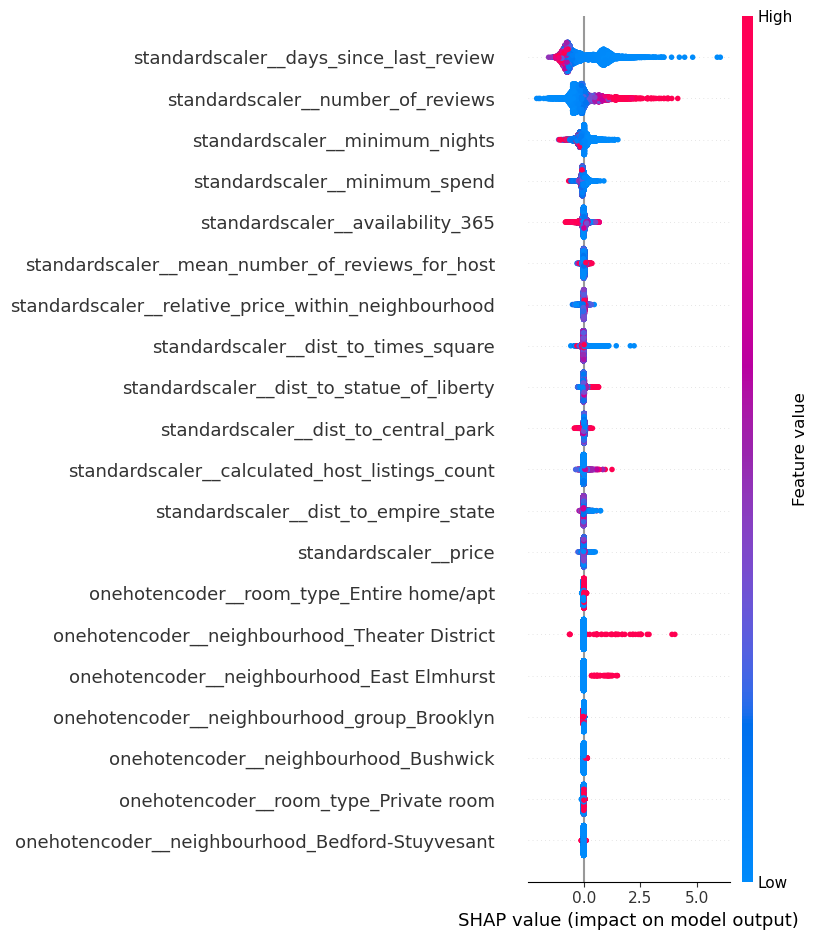

In [27]:
from shap import summary_plot

summary_plot(listings_train_shap.to_numpy(), listings_train_x_transformed, feature_names=listings_train_shap.columns)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

**1.** See below.

**2.** The test and validation scores align quite well, falling into roughly the same range of about 1 review per month for RMSE and 0.6--0.7 for R² score. This consistency between validation and test scores suggests that we have avoided significant optimization bias for the most part. Several factors support this conclusion:

- We maintained a strict separation of test data from training data throughout development.
- Our cross-validation standard deviations were relatively small.
- We limited our hyperparameter optimization iterations to reasonable ranges.

However, we should maintain some healthy skepticism about the model's reliability. While we have avoided introducing major failures into the workflow, our iterative hyperparameter optimization process and manual model selection could have introduced some degree of bias.

Even with our best model, the rather significant RMSE and modest R² score indicates that while our model captures some meaningful patterns, there is still substantial unexplained variance in review frequencies. There is likely plenty of room for improvement, which could be pursued through more sophisticated feature engineering, additional data sources, or more complex models.

**3.** See below.

In [28]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, root_mean_squared_error

optimized_light_gbm_pipeline.fit(listings_train_x, listings_train_y)
listings_test_y_predicted = optimized_light_gbm_pipeline.predict(listings_test_x)

best_r2_score = r2_score(listings_test_y, listings_test_y_predicted)
best_rmse = root_mean_squared_error(listings_test_y, listings_test_y_predicted)
best_mape = mean_absolute_percentage_error(listings_test_y, listings_test_y_predicted)

print()
print(f'R2 score: {best_r2_score}')
print(f'MAPE:     {best_mape} %')
print(f'RMSE:     {best_rmse} reviews per month')

listings_test_combined = listings_test_x.copy()
listings_test_combined['reviews_per_month'] = listings_test_y
listings_test_combined['predicted_reviews_per_month'] = listings_test_y_predicted

display(listings_test_combined.head())


R2 score: 0.6459338156142526
MAPE:     0.6865811488430499 %
RMSE:     0.9772928475417173 reviews per month


id                                               name    host_id  \
14989  11937647                           Entire Williamsburg apt.   12446288   
40517  31409612                      Tremendous Views - Greenpoint   56061729   
32631  25635216  Clean and Nice Central Park Apt in Lincoln Center  193127179   
39464  30747515                                       Bedstuy-stay   20043437   
26165  20864878                        High Line Sun Drenched Home   13462349   

              host_name neighbourhood_group       neighbourhood  latitude  \
14989  Micki & Kristian            Brooklyn        Williamsburg  40.71541   
40517            Dennis            Brooklyn          Greenpoint  40.73421   
32631            Sagawa           Manhattan     Upper West Side  40.77640   
39464          Marianne            Brooklyn  Bedford-Stuyvesant  40.68581   
26165             Elvis           Manhattan             Chelsea  40.74690   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
14989  -73.93748  Entire home/apt    110               3                  4   
40517  -73.95318  Entire home/apt    125               2                  8   
32631  -73.98236     Private room     85               4                 18   
39464  -73.95189     Private room     35              10                  3   
26165  -73.99494  Entire home/apt    200               2                 40   

      last_review  calculated_host_listings_count  availability_365  \
14989  2018-05-30                               1                 0   
40517  2019-06-10                               1               188   
32631  2019-05-03                               1               133   
39464  2019-05-31                               1                 5   
26165  2019-06-19                               1               288   

       reviews_per_month  predicted_reviews_per_month  
14989               0.10                     0.160876  
40517               1.37                     1.536059  
32631               1.38                     0.629031  
39464               0.48                     0.576151  
26165               1.81                     2.241065

In [29]:
force_plot(explainer.expected_value, listings_train_shap.to_numpy()[0], listings_train_x_transformed.to_numpy()[0], feature_names=listings_train_shap.columns)

**3.1.** This listing was predicted to have 0.35 reviews per month. The most significant contributors to this prediction are as follows:

1. A high number of `days_since_last_review` strongly nudged this prediction downwards. A long gap between reviews could indicate a lack of recent bookings, which would naturally lead to fewer reviews.
2. A lengthy `minimum_nights` requirement further decreased the predicted review frequency, suggesting that the listing's booking policy may be too restrictive for potential guests.
3. The low overall `number_of_reviews` again reinforced the prediction of low review activity due to the lack of historical data.

In [30]:
force_plot(explainer.expected_value, listings_train_shap.to_numpy()[123], listings_train_x_transformed.to_numpy()[123], feature_names=listings_train_shap.columns)

**3.2.** This listing was predicted to have 3.3 reviews per month. The most significant contributors to this prediction are as follows:

1. The positive prediction was primarily driven upwards by a short `days_since_last_review` value, since recent review activity is a strong indicator of a popular listing.
2. A reasonable `price` provided additional positive contribution. A listing that is competitively priced is likely to attract more guests and generate more reviews.
3. On the contrary, a high `minimum_nights` requirement somewhat decreased the predicted review frequency, suggesting that the listing's booking policy may be too restrictive for potential guests.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

**1.** See below.

**2.** Our analysis demonstrated that predicting the frequency of reviews on a monthly basis for New York City Airbnb listings is a challenging task with significant inherent variability. To tackle this challenge, we explored a wide variety of models and feature engineering strategies, ultimately finding that a Light GBM model performed best with an RMSE of about 0.977 reviews per month and an R² score of roughly 0.645 in testing, while offering a balance between accuracy and computational efficiency.

SHAP analysis revealed that recent review activity, review history and flexibility of booking arrangements are the most influential factors in determining review frequency (and by proxy, the popularity of a listing).

**3.** While our model shows clear improvement over baseline predictions, the modest performance metrics suggest that there is still substantial room for improvement. Future work could focus on more sophisticated feature engineering, leveraging additional data sources, or exploring more complex models to capture the nuanced relationships in the data.

If we had more time, we could explore the following ideas:

- Conducting more exhaustive hyperparameter optimization, and performing hyperparameter optimization alongside feature selection.
- Trying different preprocessing and feature engineering strategies, such as mathematically transforming numerical data or applying count vectorization for text data.
- Integrating supplemental data such as seasonal features and market trends.
- Applying deep learning to automatically extract the most complex patterns from the data.

**4.** I don't see any place to put the final test score in the Submission Instructions section.... I put it at the bottom of the blue `<div>`.

In [31]:
final_result_summary = pd.DataFrame([best_r2_score, best_mape, best_rmse], index=['R2', 'MAPE', 'RMSE'], columns=['Light GBM'])

display(final_result_summary)

Light GBM
R2     0.645934
MAPE   0.686581
RMSE   0.977293

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

We have learned that successful machine learning is not just about maximizing accuracy. It is about creating solutions that are reliable, interpretable, and practically useful in their intended context. The technical aspects of implementing algorithms are just one piece of a larger puzzle that includes understanding business context, managing computational resources, and communicating results effectively.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)